<a href="https://colab.research.google.com/github/thepankaj018/Netflix-Movies-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies & TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.express as px
import plotly.graph_objs as go


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import missingno as msno

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [5]:
# Load Dataset
file_path = '/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f'Number of rows in datasets are {df.shape[0]}')
print(f'Number of columns in datasets are {df.shape[1]}')

Number of rows in datasets are 7787
Number of columns in datasets are 12


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(f'Duplicates entries in datasets are {df.duplicated().sum()}')

Duplicates entries in datasets are 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()*100/len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

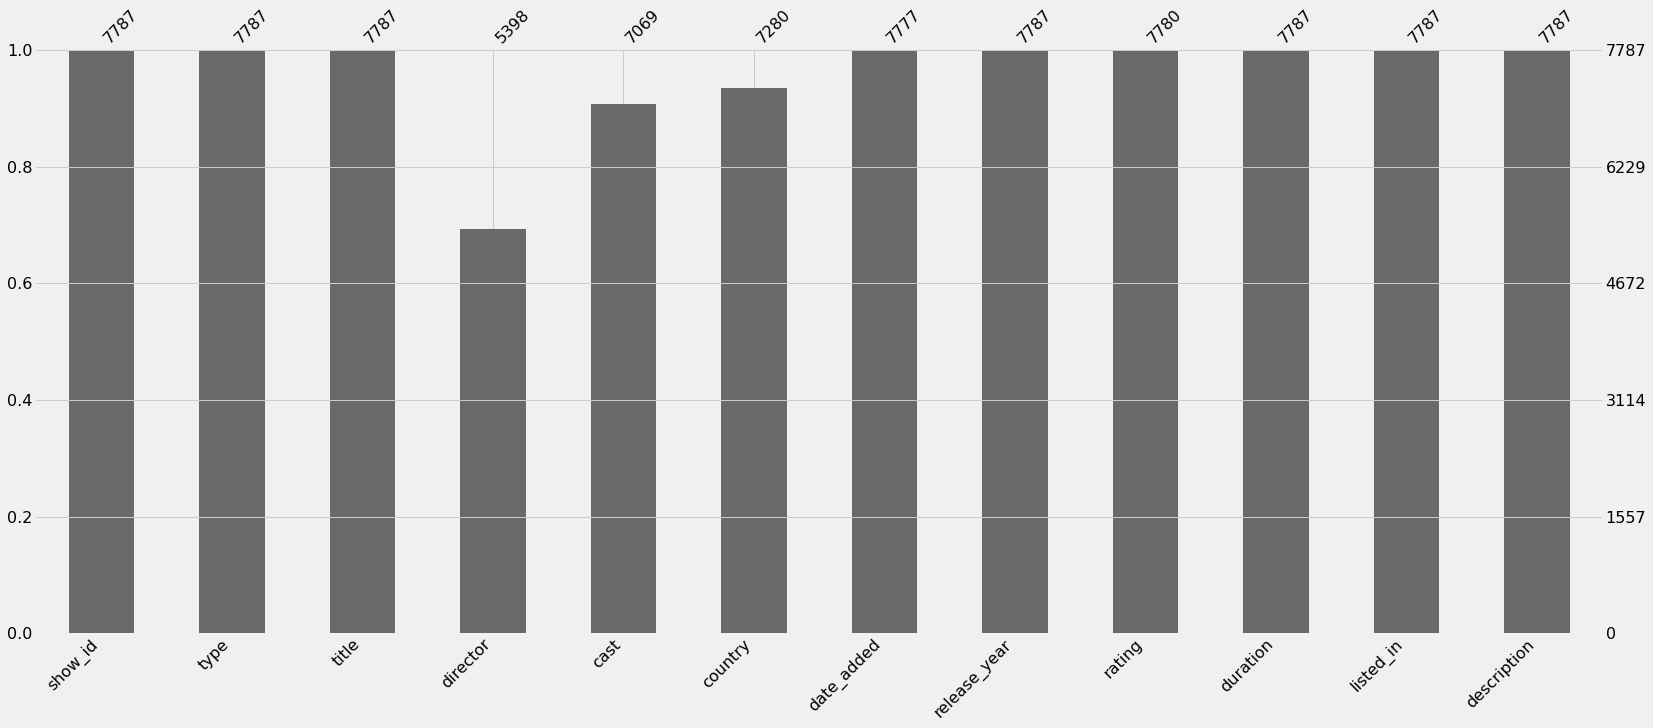

In [11]:
# Visualizing the missing values
msno.bar(df)
plt.show()

### What did you know about your dataset?

* There are 7787 rows and 12 columns present in dataset.

* Datatypes of variables present in datasets are object as well as integer.

* There is no duplicate entries in the dataset.

* There are missing values present in the column director,cast,country and rating

#### Missing Values Imputation

In [12]:
# Replacing missing values in the director, cast, and country column with 'Unknown'
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')

# Replacing the missing values present in rating column with mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Dropping the missing value present in date_added column
df.dropna(axis=0, inplace = True)

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

,release_year
count,7777.000000
mean,2013.935965
std,8.760694
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

* show_id : Unique ID for every Movie / Tv Show
* type : Identifier - A Movie or TV Show
* title : Title of the Movie / Tv Show
* director : Director of the Movie
* cast : Actors involved in the movie / show
* country : Country where the movie / show was produced
* date_added : Date it was added on Netflix
* release_year : Actual Releaseyear of the movie / show
* rating : TV Rating of the movie / show
* duration : Total Duration - in minutes or number of seasons
* listed_in : Genre
* description: The Summary description

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for elem in df.columns:
  if df[elem].nunique() < 50 :
    print("-"*100)
    print(" ")
    print(f'Unique values present in {elem} are')
    print(" ")
    print(df[elem].unique())
    print(" ")
    print("*"*100)

----------------------------------------------------------------------------------------------------
 
Unique values present in type are
 
['TV Show' 'Movie']
 
****************************************************************************************************
----------------------------------------------------------------------------------------------------
 
Unique values present in rating are
 
['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'TV-Y7' 'PG' 'G'
 'NC-17' 'TV-Y7-FV' 'UR']
 
****************************************************************************************************


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.

In [17]:
# Dropping the column show_id
df.drop(columns = ['show_id'],inplace = True)

In [18]:
# Looking datatypes of the feature available in dataset
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [19]:
df[df['type'] == 'TV Show']['duration'].unique()

# for tv shows duration is in seasons and for movies duration is in minutes

array(['4 Seasons', '1 Season', '2 Seasons', '3 Seasons', '5 Seasons',
       '9 Seasons', '8 Seasons', '6 Seasons', '11 Seasons', '7 Seasons',
       '13 Seasons', '12 Seasons', '10 Seasons', '16 Seasons',
       '15 Seasons'], dtype=object)

In [20]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x : int(x.split(" ")[0]))

In [21]:
# Creating feature month name from date_added columns
df['month_added'] = df['date_added'].apply(lambda x : x.split(" ")[0])

In [22]:
# Creating feature year from date_added columns
df['year_added'] = df['date_added'].apply(lambda x : x.split(" ")[-1])

In [23]:
# Dropping the column date_added
df.drop(columns = ['date_added'],inplace = True)

In [24]:
# Applying value counts on country
df['country'].value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [25]:
# Choosing the main country
df['country'] = df['country'].apply(lambda x : x.split(",")[0])

In [26]:
# Choosing the main genres
df['genres'] = df['listed_in'].apply(lambda x : x.split(",")[0])

In [27]:
# Applying value_counts on 'rating'.
df['rating'].value_counts().to_frame()

,rating
TV-MA,2868
TV-14,1928
TV-PG,804
R,665
PG-13,386
TV-Y,279
TV-Y7,270
PG,247
TV-G,194
NR,83


* TV-MA: This rating indicates that the content is intended for mature audiences only and may contain adult themes, language, nudity, violence, and other mature content.

* R: This rating indicates that the content is restricted and may contain adult themes, language, nudity, violence, and other mature content.

* PG-13: This rating indicates that the content may contain material that parents may find inappropriate for children under 13 years of age.

* TV-14: This rating indicates that the content may contain material that is inappropriate for children under 14 years of age.

* TV-PG: This rating indicates that the content is intended for a general audience but may contain some material that parents may find inappropriate for younger children.

* NR: This rating stands for "Not Rated" and indicates that the content has not been officially rated by a classification board.

* TV-G: This rating indicates that the content is suitable for a general audience and contains little or no violence, sexual content, or mature themes.

* TV-Y: This rating indicates that the content is intended for children under 7 years of age.

* TV-Y7: This rating indicates that the content is intended for children 7 years and older.

* PG: This rating indicates that the content may contain material that parents may find inappropriate for younger children.

* G: This rating indicates that the content is suitable for all ages and contains little or no violence, sexual content, or mature themes.

* NC-17: This rating indicates that the content is intended for adults only and may contain adult themes, language, nudity, violence, and other mature content.

* TV-Y7-FV: This rating indicates that the content is intended for children 7 years and older and may contain fantasy violence.

* UR: This rating stands for "Unrated" and indicates that the content has not been officially rated by a classification board.

In [28]:
# On the basis of description of rating ,assinging rating according to age_groups
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}

df['target_ages'] = df['rating'].replace(ratings_ages)    

In [29]:
# Now checking unique values present in target_ages
df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [30]:
# Separating dataframe on the basis of type of show
movies_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

### What all manipulations have you done and insights you found?

Following Data Manipulations are done:

* Dropped the column show_id
* Splitted the duration column in order to remove units present inside the category of duration column.
* Created feature month name from date_added columns.
* Created feature year from date_added columns.
* Selected the principle country from the available country list.
* Selected the main genres from the listed genres.
* On the basis of description of rating,assingned rating according to age_groups.
* Created movies_df and tv_df on the basis of type of show

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**UNIVARIATE ANALYSIS** 

#### Chart - 1

####Content Type on Netflix

In [31]:
def pie_chart(data, feature):
  fig = go.Figure()

  # Adding a pie chart to the figure
  fig.add_trace(go.Pie(labels=data[feature].value_counts().index,
                       values=data[feature].value_counts().values,
                       hole=0.3,
                       marker=dict(colors=['#ff9999','#66b3ff'])))

  # Updating the layout
  fig.update_layout(title='Netflix Content Distribution (Pie Chart)',
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))

  # Showing the plot
  fig.show()


In [32]:
# Plotting pie chart
# Calling the function
pie_chart(df,'type')

##### 1. Why did you pick the specific chart?

I have used pie chart beacause Pie charts are an effective visualization technique when the categories present inside a feature are limited in number. They allow us to represent the percentage distribution of each category in a clear and concise manner.

##### 2. What is/are the insight(s) found from the chart?

Around 69% content available on Netflix are Movie and 31% are TV Shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to develop personalized recommendations for users based on their viewing habits and preferences. If a user tends to watch mostly movies, the recommendation algorithm can suggest similar movies to watch, which can increase user engagement and satisfaction.

#### Chart - 2

**MOVIE RATING ANALYSIS**

In [33]:
# Creating a function to fetch required dataframe
def create_temp_df(data,feature):
  temp_df = data.groupby(feature).size().reset_index().rename(columns = {0:'counts'}).sort_values(by = ['counts'],ascending = False)
  return temp_df

In [104]:
def create_temp_df(data, feature):
    """
    This function creates a temporary dataframe by grouping the 'data' dataframe by a specified 'feature'.
    It calculates the size of each group, renames the count column to 'counts', sorts the dataframe in descending order based on 'counts',
    and returns the resulting temporary dataframe.

    Parameters:
    data (pandas.DataFrame): The input dataframe.
    feature (str): The name of the feature to group the dataframe by.

    Returns:
    temp_df (pandas.DataFrame): The resulting temporary dataframe.
    """

    # Grouping the 'data' dataframe by the specified 'feature' and calculating the size of each group
    temp_df = data.groupby(feature).size().reset_index()

    # Renaming the count column to 'counts'
    temp_df = temp_df.rename(columns={0: 'counts'})

    # Sorting the dataframe in descending order based on 'counts'
    temp_df = temp_df.sort_values(by='counts', ascending=False)

    # Returning the resulting temporary dataframe
    return temp_df


In [103]:
# Crating a function to plot bar plot
def plot_bar_chart(data, x, y, title, counts):
    """
    This function takes in a dataframe, x and y variables to be plotted, and additional parameters to create a bar chart.
    It uses Plotly Express to create a bar chart with color-coding based on the 'counts' variable.
    The function also adds axis labels, font, and formatting options to the plot and displays it using the show() function.

    Parameters:
    data (pandas.DataFrame): The input dataframe.
    x (str): The name of the column to be plotted on the x-axis.
    y (str): The name of the column to be plotted on the y-axis.
    title (str): The title of the plot.
    counts (str): The name of the column used for color-coding the plot.
    
    """
    
    # Creating a bar chart using Plotly Express
    fig = px.bar(data , x = x , y = y,
             title = title,
             color='counts',
             color_continuous_scale='teal',
             labels=dict(counts=counts))
    
    # Adding formatting options to the plot
    fig.update_layout(yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
                  font=dict(size=15, color='black', family='Arial, sans-serif'),
                  title=dict(x=0.5, font=dict(size=20)),
                  xaxis=dict(title=dict(font=dict(size=15))),
                  bargap=0.1,
                  bargroupgap=0.5)
    
    # Add hover text to the plot and customize the marker colors and line widths
    fig.update_traces(texttemplate='%{y}',
                  textposition='outside',
                  hoverinfo='x+y',
                  marker=dict(color='#FF0092', line=dict(color='black', width=1.5))) 
    
    # Display the resulting plot
    fig.show()


  

In [105]:
# Calling the function to crate required dataframe
rating_df = create_temp_df(df,'rating')
rating_df

,rating,counts
8,TV-MA,2868
6,TV-14,1928
9,TV-PG,804
5,R,665
4,PG-13,386
10,TV-Y,279
11,TV-Y7,270
3,PG,247
7,TV-G,194
2,NR,83


In [106]:
# Calling the function for the visualization
plot_bar_chart(data = rating_df,x = 'rating',y = 'counts',title = 'Countplot of rating of Movies & TV Shows',counts = 'counts of rating')

##### 1. Why did you pick the specific chart?

I have used bar chart it is more visually appealing for the variable that i have choosen.

##### 2. What is/are the insight(s) found from the chart?

Netflix Contains more Movies and Shows that have rating "TV-MA" followed by "TV-14"

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

On the positive side, having a high number of movies and shows with mature ratings can appeal to a certain demographic of viewers who prefer this type of content, potentially leading to increased viewership and subscriber growth.

On the negative side, the mature content might not be suitable for all ages, and some viewers may not be comfortable watching it. This could result in a decrease in the number of subscribers, especially if these viewers cancel their subscription or choose not to subscribe in the first place.

#### Chart - 3

**Content Added Over the Years**

In [37]:
# create_temp_df function calling
show_df = create_temp_df(df,'year_added')
show_df

,year_added,counts
11,2019,2153
12,2020,2009
10,2018,1685
9,2017,1225
8,2016,443
13,2021,117
7,2015,88
6,2014,25
3,2011,13
5,2013,11


In [38]:
# Calling the function for the visualization
plot_bar_chart(data = show_df,x = 'year_added',y = 'counts',title = 'Year wise shows distributions',counts = 'counts of shows')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

ANALYSIS OF SHOWS RELEASE YEAR

In [39]:
# Calling the function create_temp_df
release_df = create_temp_df(df,'release_year').iloc[:20,:]
release_df

,release_year,counts
69,2018,1120
68,2017,1012
70,2019,996
67,2016,881
71,2020,868
66,2015,539
65,2014,334
64,2013,266
63,2012,218
61,2010,172


In [40]:
# Calling the function for the visualization
plot_bar_chart(data = release_df,x = 'release_year',y = 'counts',title = 'Analysis of shows Releases',counts = 'counts of released shows')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

ANALYSIS OF MONTHLY ADDITION OF SHOWS 

In [41]:
# Calling the function
month_added_df = create_temp_df(df,'month_added')
# Dropping the rows present at index 0 because it is an empty rows having no values of month
month_added_df = month_added_df.drop(0)
month_added_df

,month_added,counts
3,December,817
11,October,780
5,January,746
10,November,730
8,March,661
12,September,614
2,August,612
1,April,596
6,July,592
7,June,538


In [42]:
# Calling the function for the visualization
plot_bar_chart(data = month_added_df,x = 'month_added',y = 'counts',title = 'Analysis of Monthly Addition of Shows',counts = 'counts of added shows')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

TOP 10 CONTENT CREATING COUNTRIES

In [43]:
# Calling the function
country_df = create_temp_df(df,'country')
# Dropping country having unknownn lablel
country_df = country_df[country_df['country'] != 'Unknown'].iloc[:10,:]
country_df

,country,counts
75,United States,2877
28,India,956
74,United Kingdom,576
9,Canada,259
35,Japan,236
19,France,196
64,South Korea,194
66,Spain,168
42,Mexico,123
1,Australia,107


In [44]:
# Calling the function for the visualization
plot_bar_chart(data = country_df,x = 'country',y = 'counts',title = 'Top 10 Content Creating Countries',counts = 'Content Created')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

TARGET AUDIENCE OF CONTENT

In [45]:
# Calling the function
targeted_audience_df = create_temp_df(df,'target_ages')
targeted_audience_df

,target_ages,counts
0,Adults,3624
3,Teens,2314
2,Older Kids,1327
1,Kids,512


In [46]:
# Calling the function for the visualization
plot_bar_chart(data = targeted_audience_df,x = 'target_ages',y = 'counts',title = '',counts = 'Content Created')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [47]:
# Callling the function so that we can get genres_df
genres_df = create_temp_df(df,'genres')
# Getting top 20 genres 
genres_df_20 = genres_df.iloc[:20,:]
genres_df_20

,genres,counts
12,Dramas,1384
7,Comedies,1074
10,Documentaries,751
0,Action & Adventure,721
16,International TV Shows,689
4,Children & Family Movies,502
8,Crime TV Shows,369
17,Kids' TV,357
27,Stand-Up Comedy,321
13,Horror Movies,244


In [48]:
# Chart - 8 visualization code
plot_bar_chart(data = genres_df_20,x = 'genres',y = 'counts',title = 'Top 20 Genres',counts = 'Genres Counts')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

TV shows with Most Number of Seasons

In [49]:
# Choosing title and duration of top 20 tv shows which has most number of seasons
top_20_seasons = tv_df[['title','duration']].sort_values(by = 'duration',ascending = False).iloc[:20,:]
top_20_seasons

,title,duration
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
2678,Heartland,11
1300,Cheers,11
1597,Danger Mouse: Classic Collection,10
5538,Shameless (U.S.),10


In [50]:
# Create the bar chart
fig = px.bar(top_20_seasons, x='title', y='duration')
fig.update_layout(
    title='Number of seasons of Tv Shows',
    xaxis_title='Title',
    yaxis_title='Duratio ( Number of Seasons )'
)

# Display the chart
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

**Distribution of Movie Duration**

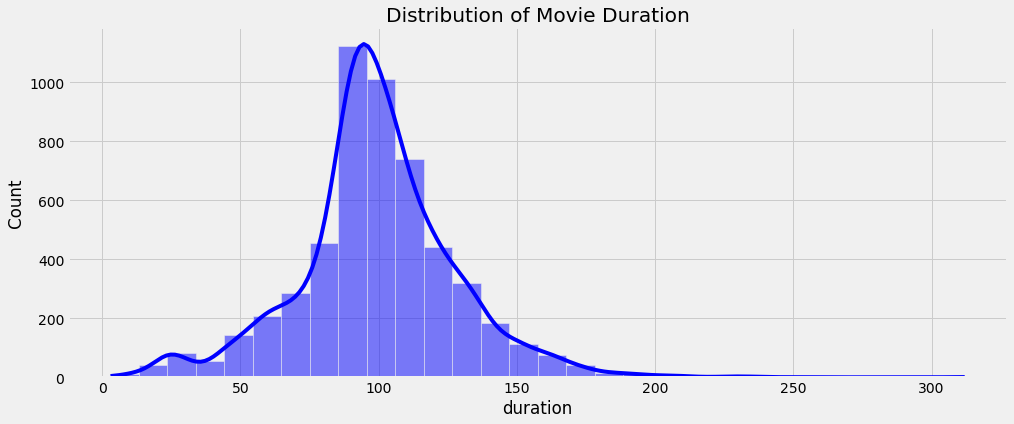

In [51]:
# Chart - 8 visualization code
plt.figure(figsize = (15,6))
sns.histplot(data = movies_df,x = 'duration',kde = True,color = 'blue',bins = 30)
plt.title('Distribution of Movie Duration')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

**TOP 10 Director of Movies**

In [52]:
movies_director_df = movies_df[movies_df['director'] != 'Unknown']

# Calling the function "create_temp_df" so that we can get top directors
top_10_movie_direct_df = create_temp_df(movies_director_df,'director').iloc[:10,:]

top_10_movie_direct_df

,director,counts
2962,"Raúl Campos, Jan Suter",18
2235,Marcus Raboy,15
1546,Jay Karas,14
605,Cathy Garcia-Molina,13
3867,Youssef Chahine,12
2300,Martin Scorsese,12
1543,Jay Chapman,12
3472,Steven Spielberg,10
847,David Dhawan,9
3328,Shannon Hartman,8


In [53]:
# Calling the function "plot_bar_chart" for visualization purpose
plot_bar_chart(data = top_10_movie_direct_df,x = 'director',y = 'counts',title = 'Top 10 Director',counts = 'Number of Movies Directed')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

**Top 10 TV Shows Director**

In [54]:
tv_shows_director_df = tv_df[tv_df['director'] != 'Unknown']

# Calling the function "create_temp_df" so that we can get top directors
top_10_tv_show_direct_df = create_temp_df(tv_shows_director_df,'director').iloc[:10,:]

top_10_tv_show_direct_df

,director,counts
3,Alastair Fothergill,3
141,Rob Seidenglanz,2
85,Ken Burns,2
147,Shin Won-ho,2
61,Iginio Straffi,2
152,Stan Lathan,2
127,"Pantham Thongsang, Cheewatan Pusitsuksa",1
126,Pali Yahya,1
114,Miguel Conde,1
115,Neslihan Yesilyurt,1


In [55]:
# Calling the function "plot_bar_chart" for visualization purpose
plot_bar_chart(data = top_10_tv_show_direct_df,x = 'director',y = 'counts',title = 'Top 10 Director',counts = 'Number of TV Shows Directed')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

**BIVARIATE ANALYSIS**

**CONTENT CATEGORY OF POPULAR DIRECTOR**

In [56]:
# Crating a function so that we can do bivariate analysis with other feature present in dataset
def create_plot(hue_param,title = 'Content Category of Popular Director'):
  # Creating a dataframe that will contain director of both movies as well as TV Shows  
  director_df = df[df['director'] != 'Unknown']
  # Calling the function "create_temp_df" so that we can get top 20 directors
  top_20_director = create_temp_df(director_df,'director').iloc[:20,:]
  # Merging top_20_director with "df" and fetching the column required for analysis
  top_20_director = pd.merge(top_20_director,df,on = 'director')[['director','counts',hue_param]].drop_duplicates(subset =['director'],
                                                                                                            keep = 'first',ignore_index = True)
  # Chart - 13 visualization code
  sns.catplot(data = top_20_director,x = 'director',y = 'counts',kind = 'bar',hue = hue_param,aspect = 3,height = 6)
  plt.title(title)
  plt.xticks(rotation = 90)
  plt.show()

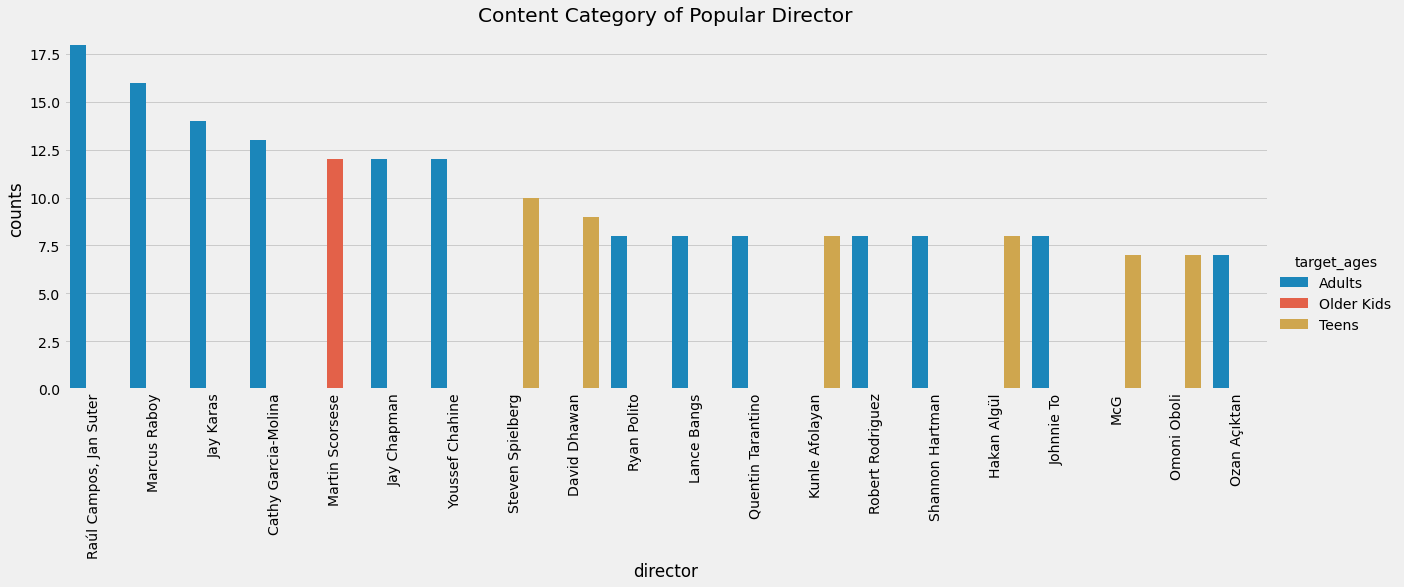

In [57]:
# Calling the function "create_plot"
create_plot('target_ages')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 

**TOP 20 DIRECTOR & THEIR FAVOURITE GENRES**

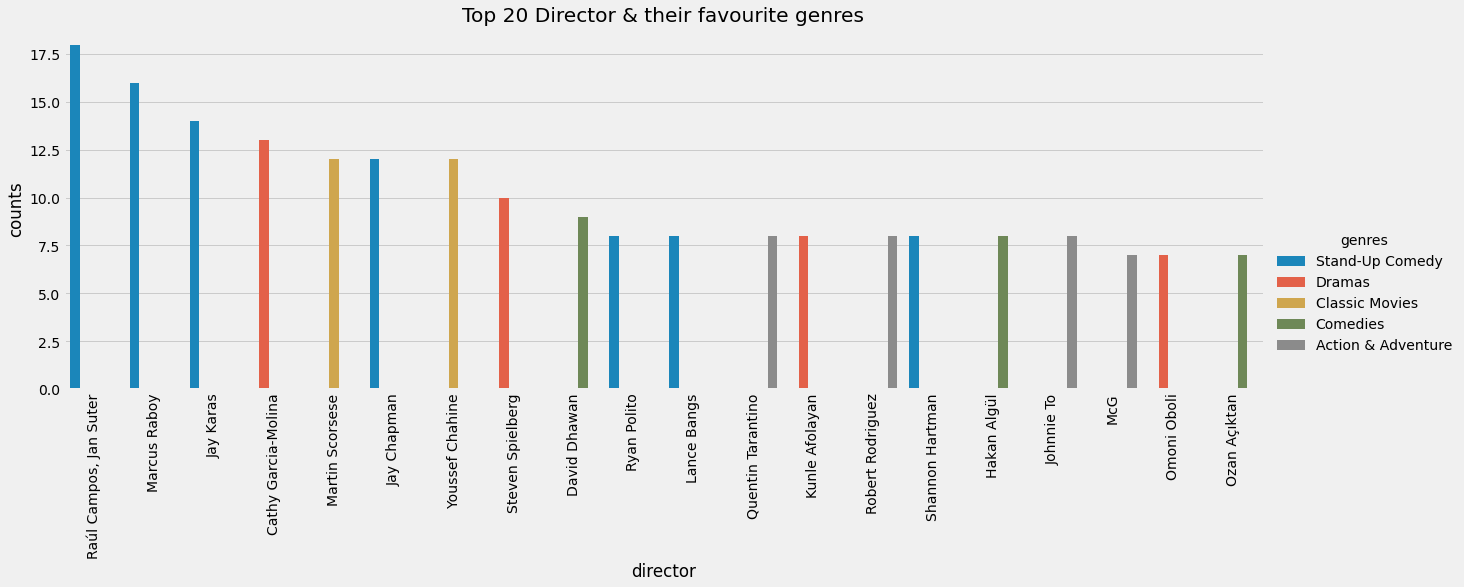

In [58]:
# Calling the function "create_plot" 
create_plot('genres',title = 'Top 20 Director & their favourite genres')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15

AVERAGE MOVIE LENGTH OVER THE YEARS

In [59]:
# Computing the average movie length for each year for movies only
movie_lengths_by_year = df[df['type'] == 'Movie'].groupby('release_year')['duration'].mean().reset_index()

# Creating a line plot using Plotly
fig = px.line(movie_lengths_by_year, x='release_year', y='duration')

# Updating the layout with a title, x-axis and y-axis labels, and a specific width and height
fig.update_layout(title='Average movie length over the years', xaxis_title='Year', yaxis_title='Length of movie in minutes', width=1000, height=500)

fig.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Chart - 16

**WORLDCLOUD ON GENRES**

In [60]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'month_added',
       'year_added', 'genres', 'target_ages'],
      dtype='object')

In [61]:
from wordcloud import WordCloud

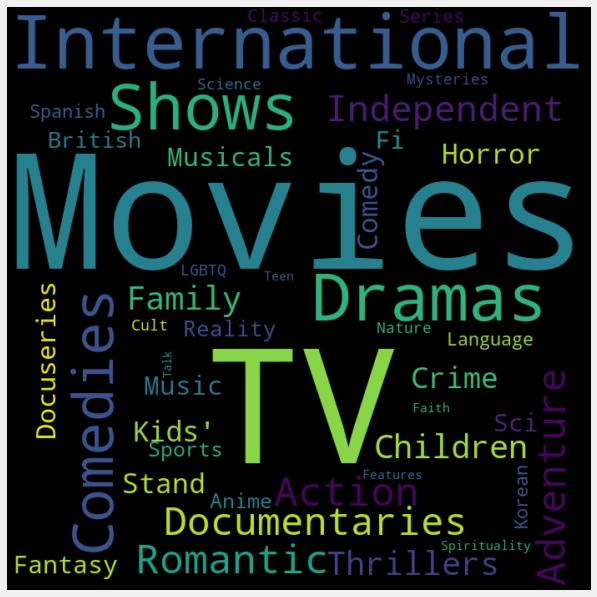

In [62]:
# creating the text variable
text = " ".join(genres for genres in df.listed_in)
# Creating word_cloud with text as argument in .generate() method
word_cloud1 = WordCloud(collocations = False,width = 700, height = 700).generate(text)
# Display the generated Word Cloud
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [63]:
# Handling Missing Values & Missing Value Imput
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
genres          0
target_ages     0
dtype: int64

Missing Value already handled

### 2. Handling Outliers

In [64]:
# Handling Outliers & Outlier treatments
df.dtypes

type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration         int64
listed_in       object
description     object
month_added     object
year_added      object
genres          object
target_ages     object
dtype: object

##### What all outlier treatment techniques have you used and why did you use those techniques?

Only two numerical column found and for this project no outlier treatment required.

### 3. Categorical Encoding

In [65]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [66]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


#### 1. Expand Contraction

In [67]:
# Expand Contraction

#### 2. Lower Casing

In [68]:
# Lower Casing

#### 3. Removing Punctuations

In [69]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [70]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [71]:
# Remove Stopwords

In [72]:
# Remove White spaces

#### 6. Rephrase Text

In [73]:
# Rephrase Text

#### 7. Tokenization

In [74]:
# Tokenization

#### 8. Text Normalization

In [75]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [76]:
# POS Taging

#### 10. Text Vectorization

In [77]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [78]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [79]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [80]:
# Transform Your data

### 6. Data Scaling

In [81]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [82]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [83]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [84]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [85]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [86]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [88]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [89]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [90]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [91]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [93]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [94]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***